<a href="https://colab.research.google.com/github/gabrieladamasceno/Model_Attacks/blob/main/Heatmap_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [16]:
df = '''
Model,Ataque Zero-Day,Accuracy,F1,Precision,Recall,Time,CPU,Memory,Energy,ZD - Accuracy,ZD - F1,ZD - Precision,ZD - Recall,ZD - Time,ZD - CPU,ZD - Memory,ZD - Energy
Decison Tree,ICMPFlood,0.999502,0.99959,0.999559,0.99962,1.12711,11.0364,3130.95,12120.9,1,1,1,1,1.11209,2.5,3133.66,139.011
Decison Tree,UDPFlood,0.623819,0.550262,0.998965,0.379709,1.12638,11.4,3003.33,13350.2,0,0,1,0,1.11742,0.781818,3003.71,4.27193
Decison Tree,SYNFlood,0.996973,0.997498,0.999557,0.995447,1.12822,0.554545,3431.83,1.5392,0.679521,0.809184,1,0.679521,1.1121,13.3455,3431.83,21146.3
Decison Tree,SYNScan,0.99949,0.999579,0.999552,0.999606,1.12637,0.672727,3340.52,2.7434,1,1,1,1,1.11188,0.781818,3340.52,4.25073
Decison Tree,HTTPFlood,0.987429,0.989525,0.999592,0.979659,1.12618,0.663636,3260.87,2.63323,0.895501,0.94487,1,0.895501,1.11334,1.03636,3260.88,9.91411
Decison Tree,UDPScan,0.999502,0.99959,0.999559,0.99962,1.12556,0.909091,3336.48,6.76517,1,1,1,1,1.11144,0.672727,3336.48,2.70702
Decison Tree,TCPConnectScan,0.984205,0.986798,0.999951,0.973986,1.12603,0.672727,3354.49,2.74256,0.0676042,0.126647,1,0.0676042,1.11222,4.64545,3354.49,892.001
Decison Tree,SlowrateDoS,0.99949,0.999579,0.999539,0.99962,1.12806,0.681818,3337.27,2.86041,1,1,1,1,1.11455,0.8,3337.27,4.56518
Random Forest,ICMPFlood,0.999761,0.999803,0.99998,0.999627,2.47412,0.663636,3130.95,5.78498,1,1,1,1,1.18569,1,3133.77,9.4855
Random Forest,UDPFlood,0.626928,0.555382,0.999982,0.384452,2.23543,2.58182,3020.01,307.772,0.00764595,0.0151759,1,0.00764595,1.5133,1.11818,3020.02,16.926
Random Forest,SYNFlood,0.997232,0.997712,0.99998,0.995454,2.44617,8.14545,3431.87,10576,0.679521,0.809184,1,0.679521,1.20721,5.56364,3431.88,1663.22
Random Forest,SYNScan,0.999757,0.9998,0.99998,0.99962,2.43644,11.2364,3357.25,27651.8,1,1,1,1,1.21061,0.890909,3357.26,6.84848
Random Forest,HTTPFlood,0.963282,0.968763,0.999978,0.939437,2.39931,0.790909,3263.64,9.49633,0.685012,0.813065,1,0.685012,1.32207,1.24545,3263.64,20.4327
Random Forest,UDPScan,0.999544,0.999623,0.99998,0.999267,2.462,2.68182,3280.03,379.898,0.983401,0.991631,1,0.983401,1.22226,14.7182,3280.04,31175.8
Random Forest,TCPConnectScan,0.983181,0.98593,0.999986,0.972263,2.41292,0.563636,3354.25,3.45645,0.00493462,0.00982077,1,0.00493462,1.21224,1,3354.26,9.69795
Random Forest,SlowrateDoS,0.999704,0.999756,0.999973,0.999539,2.45646,0.681818,3222.55,6.22881,0.999173,0.999586,1,0.999173,1.26159,0.9,3222.55,7.3576
Catboost,ICMPFlood,0.999745,0.99979,0.99998,0.9996,2.57166,0.109091,3669.19,0.0267097,1,1,1,1,1.11656,0.581818,3437.73,1.75927
Catboost,UDPFlood,0.626829,0.555212,0.999982,0.384289,2.56209,0.9,3377.65,14.9421,0.00738342,0.0146586,1,0.00738342,1.68854,8.10909,3236.74,7203.09
Catboost,SYNFlood,0.997212,0.997695,0.99998,0.99542,2.57574,0.8,4005.27,10.5502,0.679521,0.809184,1,0.679521,1.13293,14.3455,3756.37,26756.9
Catboost,SYNScan,0.998133,0.998457,0.99998,0.99694,2.56181,0.345455,3932.04,0.844908,0.899332,0.946998,1,0.899332,1.14722,0.463636,3658.58,0.914677
Catboost,HTTPFlood,0.999766,0.999807,0.999688,0.999925,2.53908,0.9,3661.37,14.8079,1,1,1,1,1.30561,2.50909,3463.58,164.989
Catboost,UDPScan,0.999531,0.999613,0.999986,0.99924,2.5508,0.454545,3938.19,1.91646,0.983401,0.991631,1,0.983401,1.14284,14.5091,3653.27,27925.1
Catboost,TCPConnectScan,0.998141,0.998464,1,0.996933,2.68531,3.3,3882.06,772.015,0.903035,0.949047,1,0.903035,1.16101,1.45455,3662.99,28.583
Catboost,SlowrateDoS,0.999749,0.999793,0.999986,0.9996,2.65228,2.47273,3853.33,320.803,1,1,1,1,1.2312,2.50909,3629.51,155.585
MLP,ICMPFlood,0.997121,0.99762,0.99985,0.9954,13.252,3.50909,4340.92,4580.96,0,0,1,0,2.14884,1.11818,4043.83,24.0342
MLP,UDPFlood,0.623786,0.550174,0.999089,0.379607,12.7216,4.04545,4028.66,6738.03,0,0,1,0,6.2383,0.554545,4034.06,8.51075
MLP,SYNFlood,0.997866,0.998241,0.997385,0.999098,15.4534,4.39091,4268.49,10465.9,0.999479,0.999739,1,0.999479,2.28192,15.4091,4102.43,66791.6
MLP,SYNScan,0.997023,0.997546,0.996506,0.998589,13.5292,3.84545,4263.56,6154.66,0.998716,0.999358,1,0.998716,2.34736,4.23636,4263.7,1427.74
MLP,HTTPFlood,0.925384,0.934597,0.996878,0.879641,13.0374,3.85455,4202.51,5973.13,0.384405,0.555336,1,0.384405,3.33307,7.34545,4048.06,10567.9
MLP,UDPScan,0.996854,0.997403,0.998179,0.996628,12.6884,3.46364,4234.03,4217.88,0.99906,0.99953,1,0.99906,2.27468,0.781818,4234.48,8.69617
MLP,TCPConnectScan,0.996011,0.996706,0.997648,0.995766,13.0813,2.62727,4348.25,1897.82,0.96077,0.979992,1,0.96077,2.30451,0.881818,4169.39,12.6417
MLP,SlowrateDoS,0.972407,0.976752,0.997989,0.9564,13.1411,2.85455,4260.87,2445.31,0.580707,0.734744,1,0.580707,2.73666,1.57273,4263.13,85.167
Autoencoder,ICMPFlood,0.494305,0.447149,0.662621,0.337425,13.2141,2.04545,3970.57,904.684,1,1,1,1,2.08599,0.563636,3362.8,2.98813
Autoencoder,UDPFlood,0.326884,0.159541,0.327937,0.105412,13.9664,3.55455,3492.96,5017.95,0.000557859,0.0011151,1,0.000557859,6.65502,0.454545,3118.24,5.00002
Autoencoder,SYNFlood,0.492972,0.44696,0.659379,0.338056,14.0623,1.69091,3756,543.887,0.863992,0.927034,1,0.863992,2.17536,1.10909,3469.79,23.7423
Autoencoder,SYNScan,0.49236,0.449499,0.655716,0.341957,13.4301,2.45455,3630.56,1588.85,1,1,1,1,2.30192,0.463636,3486.45,1.83533
Autoencoder,HTTPFlood,0.47904,0.468108,0.613981,0.378243,13.6729,3.20909,3305.19,3614.91,1,1,1,1,3.45498,0.345455,3394.91,1.13948
Autoencoder,UDPScan,0.488395,0.442935,0.65124,0.335593,13.4409,1.69091,3454.49,519.85,0.844347,0.915605,1,0.844347,2.32772,3.51818,3576.67,810.914
Autoencoder,TCPConnectScan,0.49766,0.448252,0.670404,0.336685,14.4834,1.9,4176.18,794.732,0.0266469,0.0519106,1,0.0266469,2.53654,6.60909,4317.41,5858.1
Autoencoder,SlowrateDoS,0.476943,0.445861,0.622867,0.347195,13.5382,1.91818,4145.54,764.397,1,1,1,1,2.97877,0.681818,4265.71,7.55323'''

In [17]:
df = pd.read_csv(io.StringIO(df))

print("DataFrame")
print(df.head())

DataFrame
          Model Ataque Zero-Day  Accuracy        F1  Precision    Recall  \
0  Decison Tree       ICMPFlood  0.999502  0.999590   0.999559  0.999620   
1  Decison Tree        UDPFlood  0.623819  0.550262   0.998965  0.379709   
2  Decison Tree        SYNFlood  0.996973  0.997498   0.999557  0.995447   
3  Decison Tree         SYNScan  0.999490  0.999579   0.999552  0.999606   
4  Decison Tree       HTTPFlood  0.987429  0.989525   0.999592  0.979659   

      Time        CPU   Memory       Energy  ZD - Accuracy   ZD - F1  \
0  1.12711  11.036400  3130.95  12120.90000       1.000000  1.000000   
1  1.12638  11.400000  3003.33  13350.20000       0.000000  0.000000   
2  1.12822   0.554545  3431.83      1.53920       0.679521  0.809184   
3  1.12637   0.672727  3340.52      2.74340       1.000000  1.000000   
4  1.12618   0.663636  3260.87      2.63323       0.895501  0.944870   

   ZD - Precision  ZD - Recall  ZD - Time   ZD - CPU  ZD - Memory  ZD - Energy  
0               1  

In [18]:
data_for_heatmap = df[['Model', 'Ataque Zero-Day', 'Accuracy', 'ZD - Accuracy']]
data_for_heatmap = data_for_heatmap.rename(columns={'ZD - Accuracy': 'Accuracy Zero-Day', 'Ataque Zero-Day': 'Attack Zero-Day'})

In [19]:
df_melted = data_for_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Accuracy', 'Accuracy Zero-Day'],
    var_name='Scenario',
    value_name='Accuracy Value'
)

df_pivot = df_melted.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Accuracy Value'
)



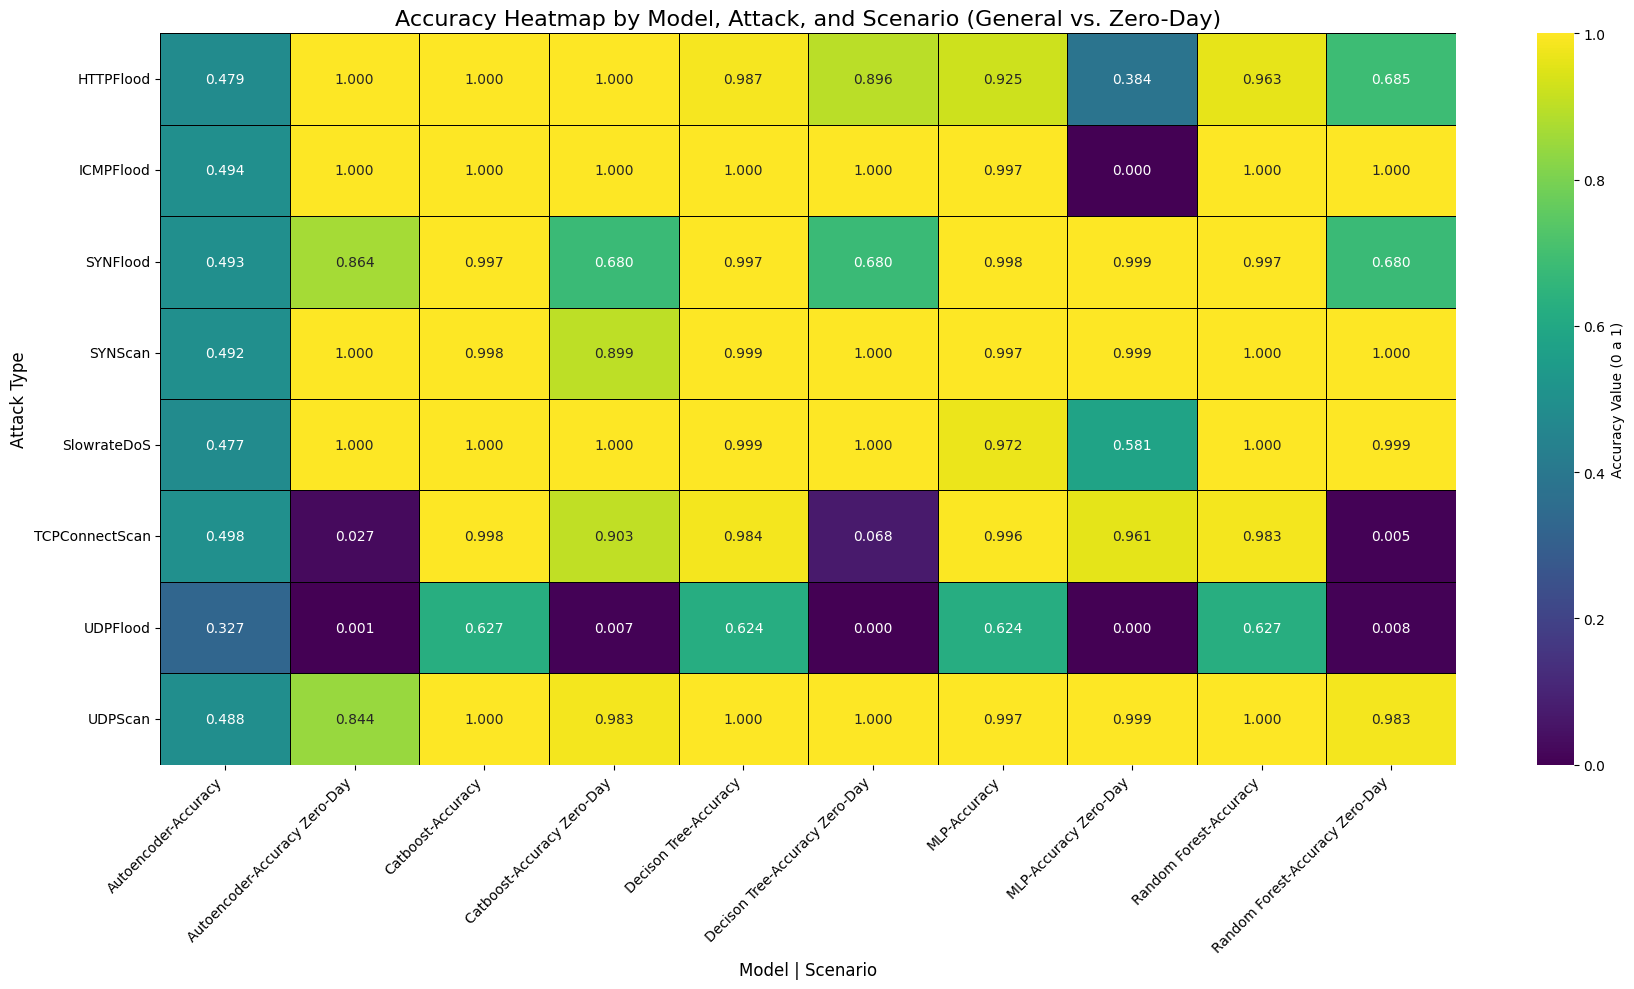

In [20]:
plt.figure(figsize=(18, 10))

sns.heatmap(
    df_pivot,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Accuracy Value (0 a 1)'}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# CPU

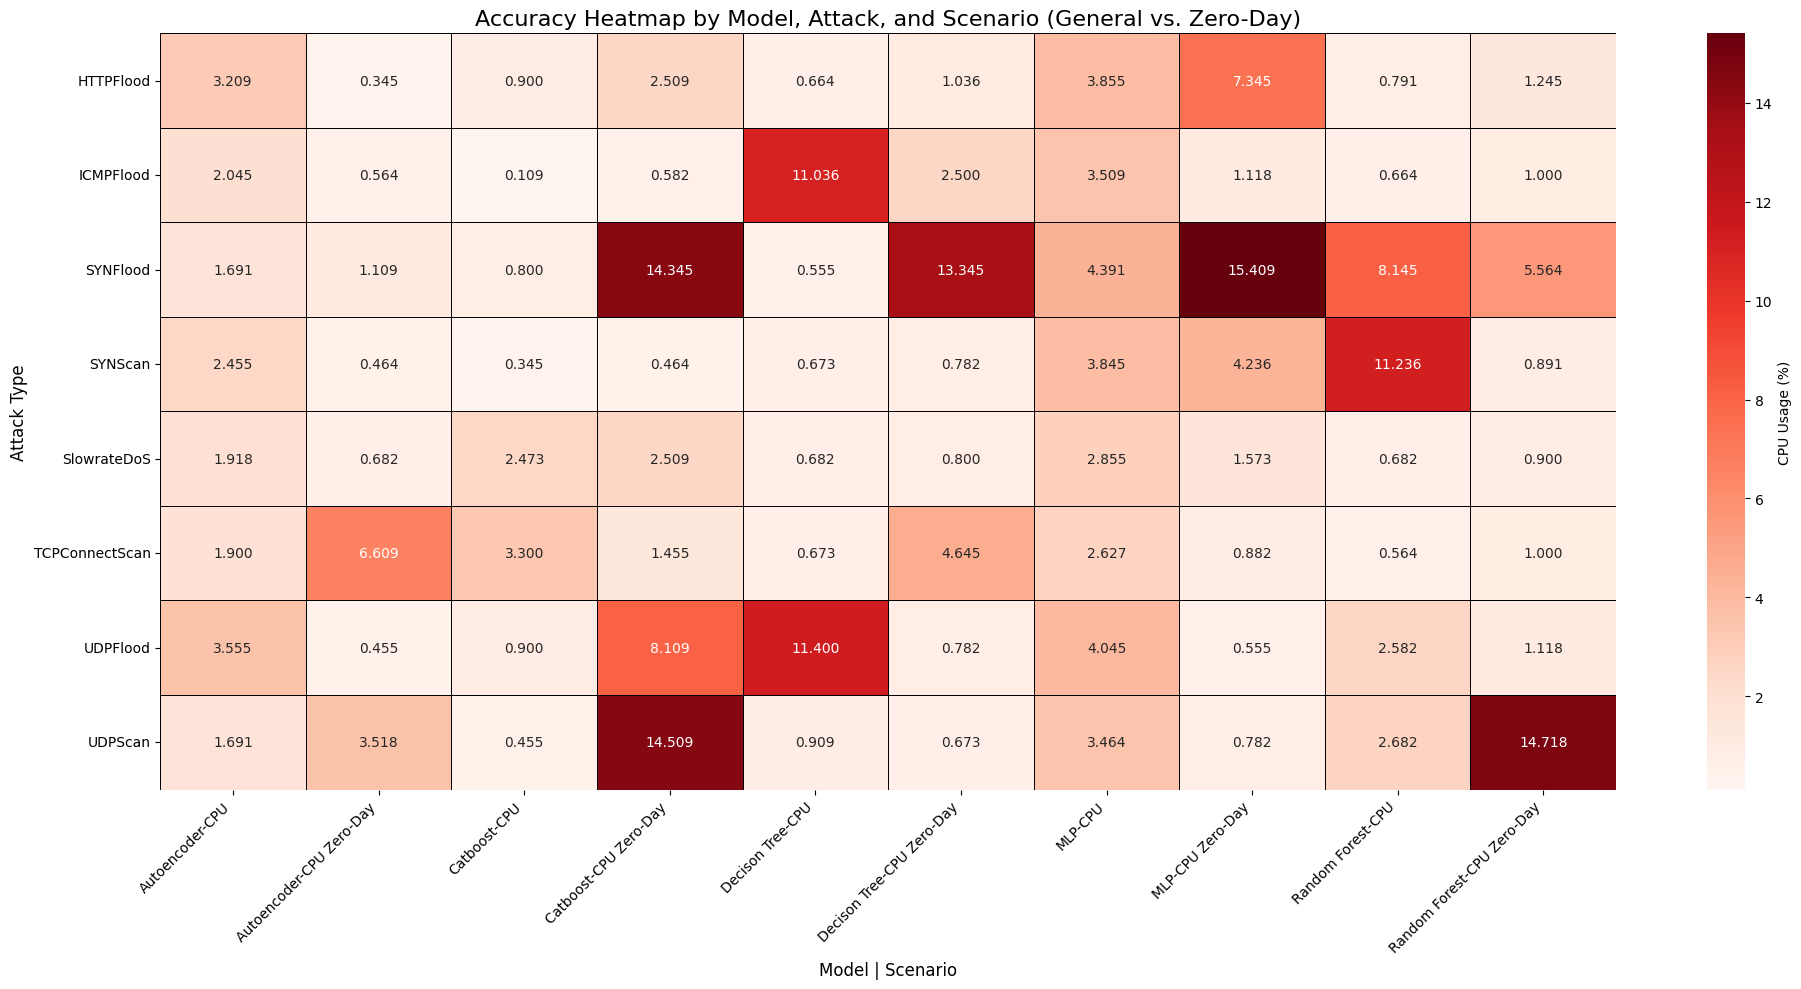

In [21]:
data_cpu_heatmap = df[['Model', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']]
data_cpu_heatmap = data_cpu_heatmap.rename(columns={'ZD - CPU': 'CPU Zero-Day', 'Ataque Zero-Day': 'Attack Zero-Day'})

df_melted_cpu = data_cpu_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['CPU', 'CPU Zero-Day'],
    var_name='Scenario',
    value_name='Uso de CPU'
)

df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Uso de CPU'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".3f",
    cmap="Reds",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'CPU Usage (%)'}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Memory

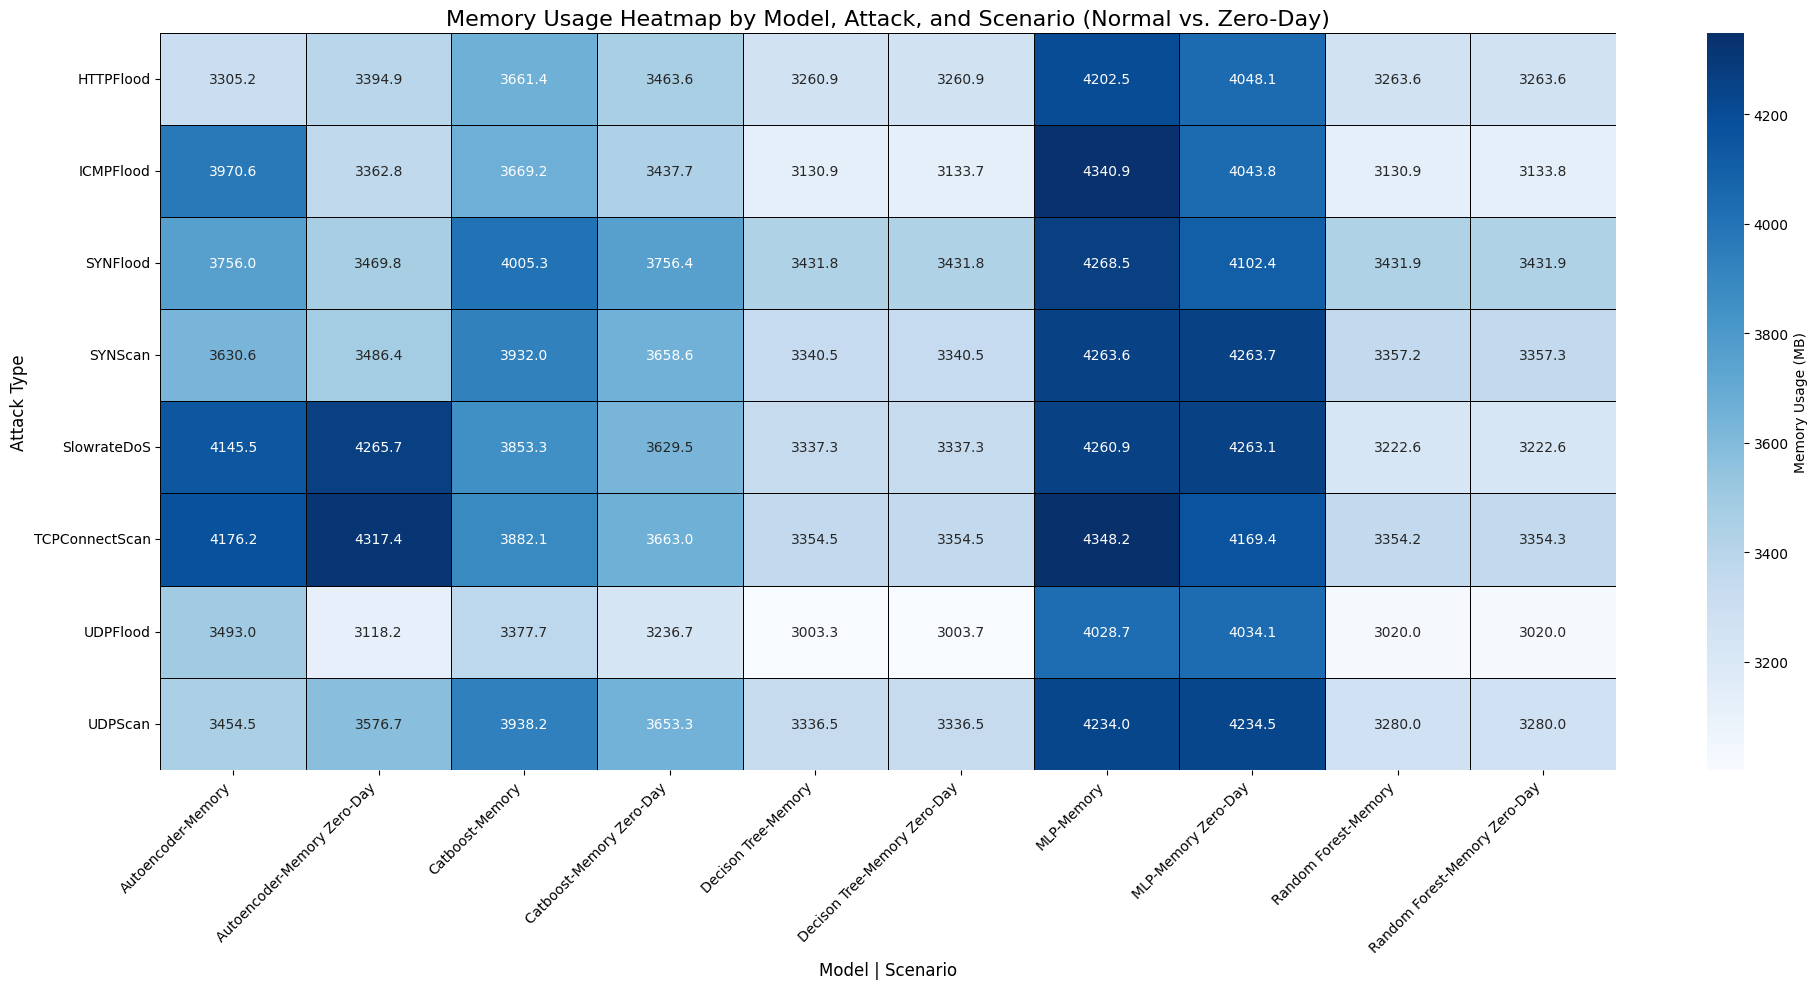

In [22]:
data_memory_heatmap = df[['Model', 'Ataque Zero-Day', 'Memory', 'ZD - Memory']]

data_memory_heatmap = data_memory_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Memory': 'Memory Zero-Day'
})

df_melted_memory = data_memory_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Memory', 'Memory Zero-Day'],
    var_name='Scenario',
    value_name='Memory Usage (MB)'
)

df_pivot_memory = df_melted_memory.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Memory Usage (MB)'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_memory,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Memory Usage (MB)'}
)

plt.title('Memory Usage Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Energy

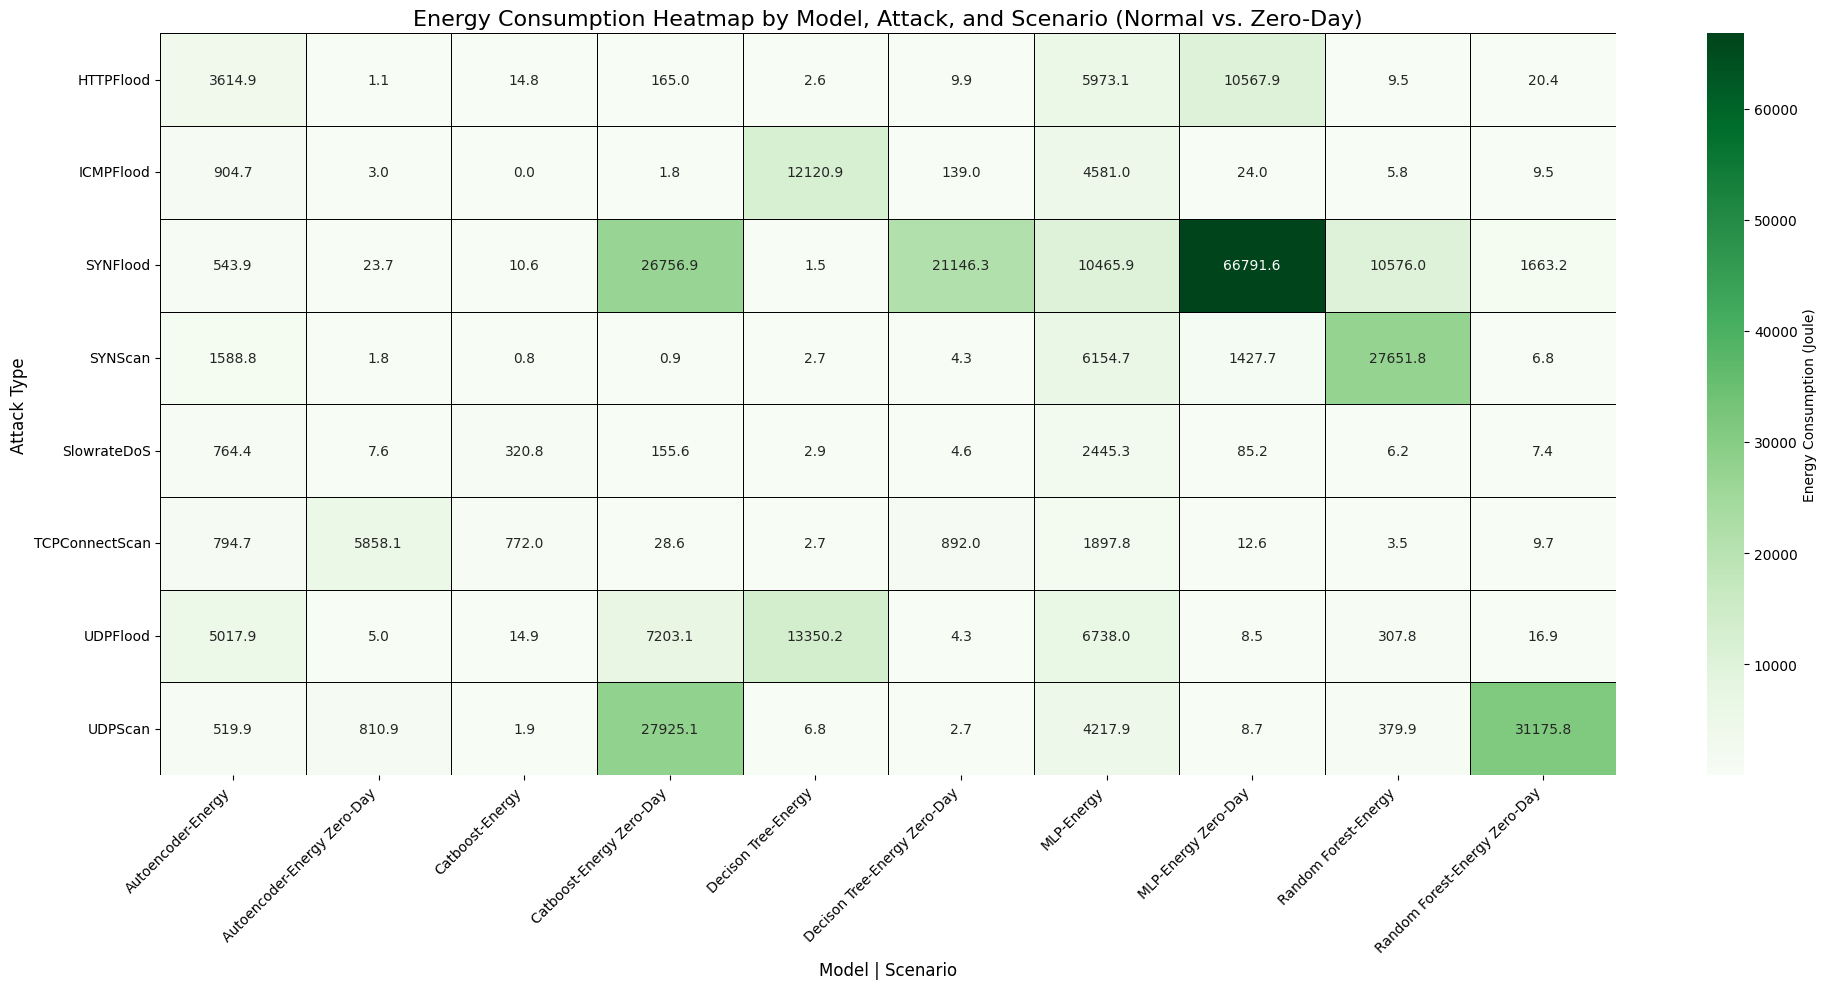

In [23]:
data_energy_heatmap = df[['Model', 'Ataque Zero-Day', 'Energy', 'ZD - Energy']]

data_energy_heatmap = data_energy_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Energy': 'Energy Zero-Day'
})

df_melted_energy = data_energy_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Energy', 'Energy Zero-Day'],
    var_name='Scenario',
    value_name='Energy Consumption'
)

df_pivot_energy = df_melted_energy.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Energy Consumption'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_energy,
    annot=True,
    fmt=".1f",
    cmap="Greens",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Energy Consumption (Joule)'}
)

plt.title('Energy Consumption Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

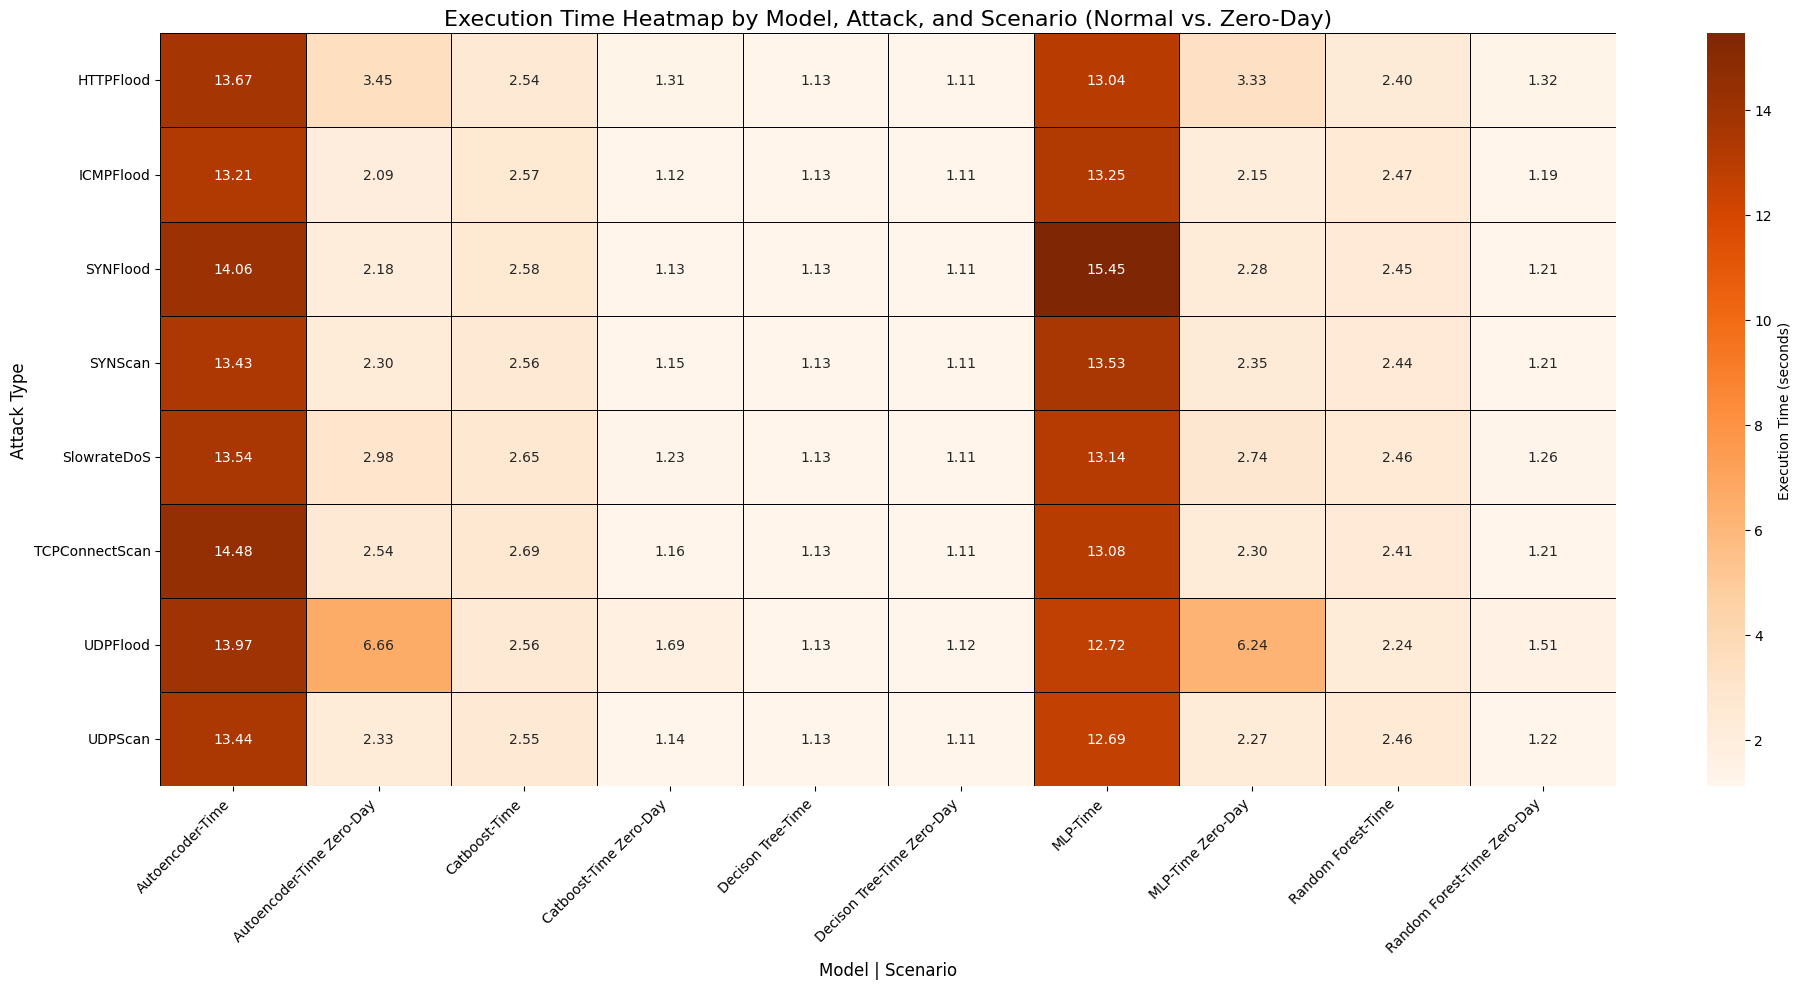

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_time_heatmap = df[['Model', 'Ataque Zero-Day', 'Time', 'ZD - Time']]

data_time_heatmap = data_time_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Time': 'Time Zero-Day'
})

df_melted_time = data_time_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Time', 'Time Zero-Day'],
    var_name='Scenario',
    value_name='Execution Time (s)'
)

df_pivot_time = df_melted_time.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Execution Time (s)'
)

plt.figure(figsize=(20, 10))

sns.heatmap(
    df_pivot_time,
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Execution Time (seconds)'}
)

plt.title('Execution Time Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=16)
plt.xlabel('Model | Scenario', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()